In [ ]:
from sklearn.datasets import make_classification,make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap
from keras.optimizers import Adam

# LINEAR SEPARABLE PROBLEM

In [ ]:
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend()

In [ ]:
def plot_decision_boundary(func, X, y,epochs, figsize=(9, 6)):
    xmin, ymin = X.min(axis=0) - 0.1
    xmax, ymax = X.max(axis=0) + 0.1
    hticks = np.linspace(xmin, xmax, epochs+1)
    vticks = np.linspace(ymin, ymax, epochs+1)
    
    xx, yy = np.meshgrid(hticks, vticks)
    xy = np.c_[xx.ravel(), yy.ravel()]
    z = func(xy)
    zz = z.reshape(xx.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(xx, yy, zz, cmap=cm, alpha=0.8)
    
    ax_z = fig.colorbar(contour)
    ax_z.set_label("$P(y = 1)$")
    ax_z.set_ticks([0, 0.2, 0.5, 0.7, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("x_1")
    plt.ylabel("x_2")

    #plot_data(X,y)

# Generate a Random binary classification dataset

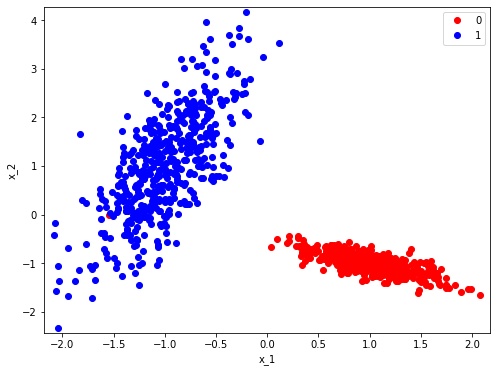

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=7, n_clusters_per_class=1 )
plot_data(X, y)

# Split dataset for training and testing

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# train a classification model using Logistic Regression

In [ ]:
regressor=LogisticRegression()

In [ ]:
regressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Plot the decision boundary in this case the line of *best 'seat'*

Boundary equation is given by: \begin{align}
        Boundary = \frac{-(w_1 *range+b)}{w_2}
    \end{align}

Learnt coefficients: [[-3.76195929  2.05172631]]
Learnt intercept: [-0.31916998]
Boundary y-Coordinates:  [-3.84540142  4.15039261]


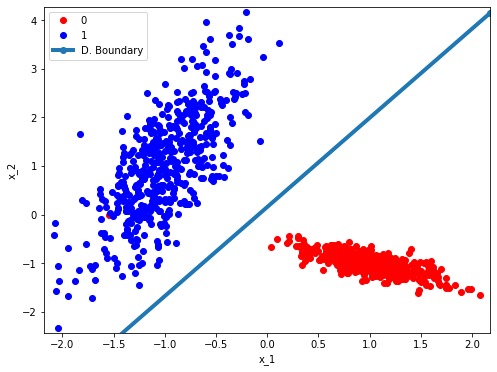

In [ ]:
print('Learnt coefficients:', regressor.coef_)
print('Learnt intercept:', regressor.intercept_)

plot_data(X, y)

limits = np.array([min(X[:,0])-0.1, max(X[:,0])+0.1])
boundary = -(regressor.coef_[0][0] * limits + regressor.intercept_[0]) / regressor.coef_[0][1]
print('Boundary y-Coordinates: ',boundary)
plt.plot(limits, boundary, "o-", linewidth=4,label="D. Boundary")
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()

An Even better boundary using contours:

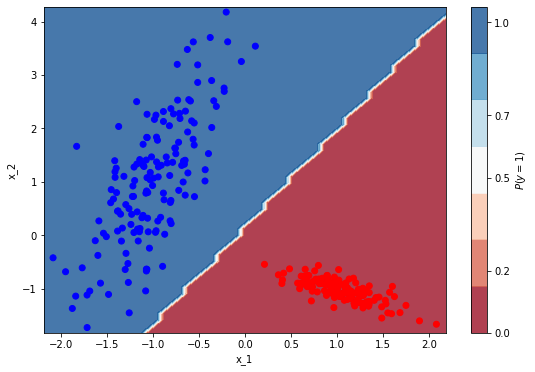

In [ ]:
plot_decision_boundary(lambda X_test: regressor.predict(X_test), X_test, y_test,epochs)

# Test the Model and generate confusion matrix

In [ ]:
y_hat=regressor.predict(X_test)

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       153

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
confusion_matrix(y_test,y_hat)

array([[147,   0],
       [  0, 153]])

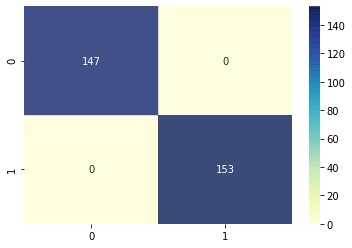

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_hat)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

# NON-LINEAR SEPARABLE PROBLEM

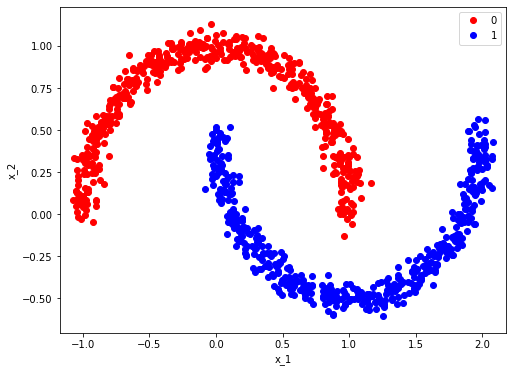

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)
plot_data(X, y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
regressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Learnt coefficients: [[ 1.14100217 -5.08370509]]
Learnt intercept: [0.89331205]
Boundary y-Coordinates:  [-0.08778514  0.6647502 ]


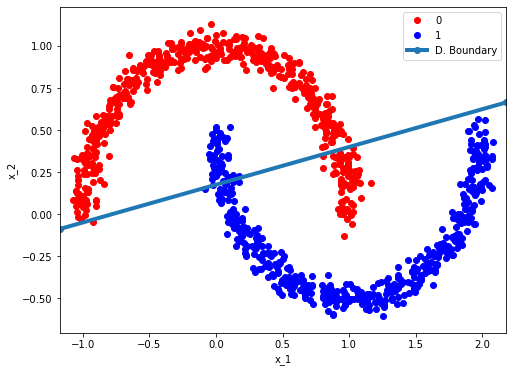

In [ ]:
print('Learnt coefficients:', regressor.coef_)
print('Learnt intercept:', regressor.intercept_)

plot_data(X, y)

limits = np.array([min(X[:,0])-0.1, max(X[:,0])+0.1])
boundary = -(regressor.coef_[0][0] * limits + regressor.intercept_[0]) / regressor.coef_[0][1]
print('Boundary y-Coordinates: ',boundary)
plt.plot(limits, boundary, "o-", linewidth=4,label="D. Boundary")
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()

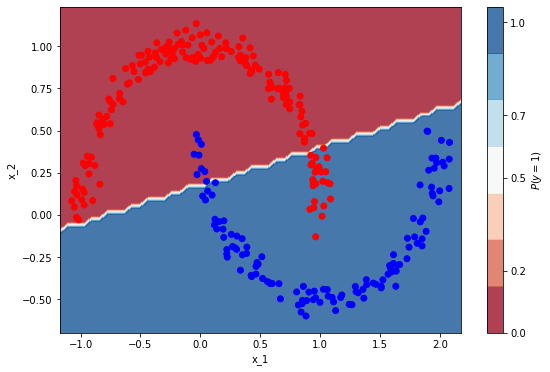

In [ ]:
plot_decision_boundary(lambda X_test: regressor.predict(X_test), X_test, y_test,epochs)

In [ ]:
y_hat=regressor.predict(X_test)

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90       176
           1       0.82      0.93      0.87       124

    accuracy                           0.88       300
   macro avg       0.88      0.89      0.88       300
weighted avg       0.89      0.88      0.88       300



In [ ]:
confusion_matrix(y_test,y_hat)

array([[150,  26],
       [  9, 115]])

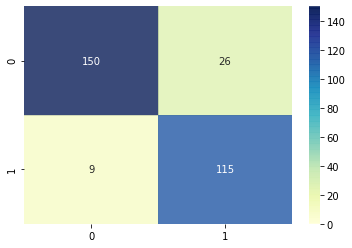

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_hat)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

Just confirming how balanced our test dataset is:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Class 0'), Text(0, 0, 'Class 1')]

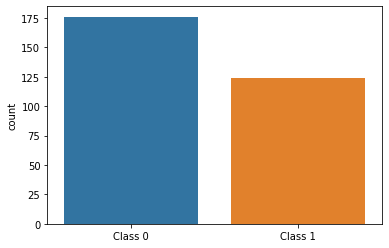

In [ ]:
sns.countplot(y_test).set_xticklabels(['Class 0','Class 1'])

# We can do better with a Non-Linear model 

Feed Forward Non Linear Model

# Simple Feed Forward ANN is still same as Logistic Regression

In [ ]:
model=Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['Precision','Recall'])

history = model.fit(X, y, verbose=0, epochs=100)

# Deep Feed Forward ANN is Non-Linear

In [ ]:
epochs=200

model_2 = Sequential()
model_2.add(Dense(4, input_shape=(2,), activation='tanh'))
model_2.add(Dense(2, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(Adam(learning_rate=0.01), 'binary_crossentropy', metrics=['Precision','Recall'])

history = model_2.fit(X, y, verbose=0, epochs=epochs)


In [ ]:
model_2.summary()

In [ ]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.head()

In [ ]:
historydf['F-Measure']=(2*historydf['precision']*historydf['recall'])/(historydf['precision']+historydf['recall'])

In [ ]:
historydf.head()

In [ ]:
historydf.drop(['precision','recall'],axis=1,inplace=True)

In [ ]:
final_loss=historydf['loss'].to_numpy()[-1]
final_f1=historydf['F-Measure'].to_numpy()[-1]

Text(0.5, 1.0, 'Final Loss: 0.000, Final F1_score: 1.000')

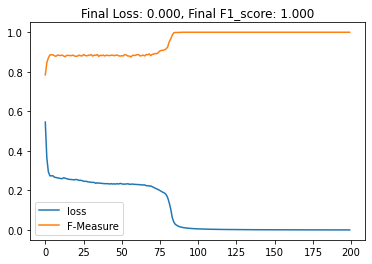

In [ ]:
historydf.plot()
plt.title('Final Loss: %.3f, Final F1_score: %.3f' % (final_loss, final_f1))

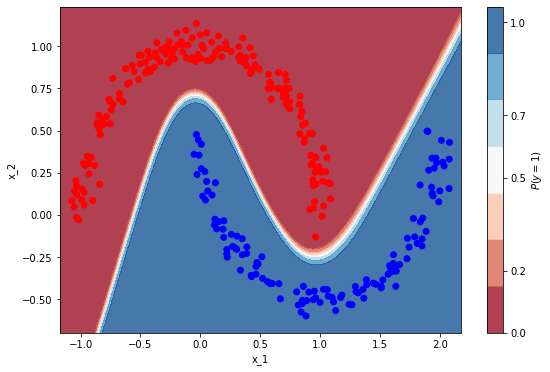

In [ ]:
plot_decision_boundary(lambda X_test: model_2.predict(X_test), X_test, y_test,epochs)